In [1]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [5]:
#Load the iris dataset from sklearn 
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
#type of data set
type(iris)

sklearn.utils.Bunch

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [11]:
x =iris.data

In [13]:
y = iris.target

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#Initialized KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
knn.predict([[3, 5, 4, 2]])

array([2])

In [17]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]

In [18]:
knn.predict(X_new)

array([2, 1])

In [19]:
knn.predict([[100,1000,100,100]])

array([2])

In [21]:
from sklearn.linear_model import LogisticRegression
#initialize logistic regression
lr = LogisticRegression()
lr.fit(x,y)
lr.predict(X_new)


array([2, 0])

## Evalution matrix

In [24]:
from sklearn import metrics

In [25]:
y_pred_for_lr = lr.predict(x)
#Logistic regression accuracy
metrics.accuracy_score(y, y_pred_for_lr)

0.95999999999999996

In [26]:
knn_test = KNeighborsClassifier(n_neighbors=1)
knn_test.fit(x,y)
y_predict_knn_for1=knn_test.predict(x)
# KNeighborsClassifier regression accuracy for n_neighbors=1
metrics.accuracy_score(y,y_predict_knn_for1)

1.0

In [27]:
knn_test =KNeighborsClassifier(n_neighbors=5)
knn_test.fit(x,y)
y_pre_knn_for5 = knn_test.predict(x)
# KNeighborsClassifier regression accuracy for n_neighbors=5
metrics.accuracy_score(y,y_pre_knn_for5)

0.96666666666666667

## Cross validation

In [37]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

In [29]:
print(x_train.shape)
print(y_train.shape)

(90, 4)
(90,)


In [30]:
print(x_test.shape)
print(y_train.shape)

(60, 4)
(90,)


In [31]:
l = LogisticRegression()
l.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_l_predict = l.predict(x_test)
metrics.accuracy_score(y_test, y_l_predict)

0.94999999999999996

In [33]:
knn_test =KNeighborsClassifier(n_neighbors=5)
knn_test.fit(x_train,y_train)
y_pre_knn_for5 = knn_test.predict(x_test)
metrics.accuracy_score(y_test,y_pre_knn_for5)

0.96666666666666667

In [34]:
knn_test =KNeighborsClassifier(n_neighbors=1)
knn_test.fit(x_train,y_train)
y_pre_knn_for5 = knn_test.predict(x_test)
#accuracy score for n_neighbors =5
metrics.accuracy_score(y_test,y_pre_knn_for5)

0.94999999999999996

In [35]:
best_k_neighbor_in_range = range(1,25)
result =[]
#Find the n_neighbor value for KNeighborsClassifier from vlue 1 to 25
for k_value in best_k_neighbor_in_range:
    knn_test =KNeighborsClassifier(n_neighbors=k_value)
    knn_test.fit(x_train,y_train)
    y_pre_knn_for5 = knn_test.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pre_knn_for5)
    result.append(score)

len(result)

24

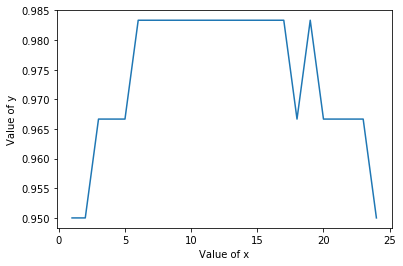

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline
#drow the result for accuracy score for KNeighborsClassifier with the help of matplotlib
plt.plot(best_k_neighbor_in_range, result)
plt.xlabel("Value of x")
plt.ylabel("Value of y")